<a href="https://colab.research.google.com/github/Antara-Risha/Breast-cancer-detection-using-transfer-learning/blob/main/Whole_Dataset_MobileNet_V3_small_Breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip uninstall keras-applications

Found existing installation: Keras-Applications 1.0.8
Uninstalling Keras-Applications-1.0.8:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras_Applications-1.0.8.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras_applications/*
Proceed (y/n)? y
  Successfully uninstalled Keras-Applications-1.0.8


In [ ]:
pip install git+https://github.com/keras-team/keras-applications.git@master

  Cloning https://github.com/keras-team/keras-applications.git (to revision master) to /tmp/pip-req-build-2_7qei1r
  Running command git clone -q https://github.com/keras-team/keras-applications.git /tmp/pip-req-build-2_7qei1r


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as keras 
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical
from keras_applications.mobilenet_v3 import MobileNetV3Small


In [ ]:
pip install keras-utils

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
!gdown --id 1nLizY9-V3gxuHw1sphQ62yTZBOKTDZCC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nLizY9-V3gxuHw1sphQ62yTZBOKTDZCC
To: /content/400X.zip
100% 4.22G/4.22G [00:28<00:00, 148MB/s]


In [ ]:
!unzip -q /content/400X.zip

replace 400X/400X/benign/adenosis/test/SOB_B_A-14-22549G-100-026.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A




In [ ]:
X_train = []
y_train = []

import glob
import cv2
train_files = glob.glob('/content/400X/400X/*/*/train/*')

def view_fig(img):
    plt.clf()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

for file_path in train_files:
    label = file_path.split('/')[3]
    data = cv2.imread(file_path, cv2.IMREAD_COLOR)
    data = cv2.resize(data,(56,56))
    X_train.append(data)
    if(label=='benign'):
        y_train.append(0)
    else:
        y_train.append(1) 

In [ ]:
X_test = []
y_test = []

import glob
import cv2
train_files = glob.glob('/content/400X/400X/*/*/test/*')


# def view_fig(img):
#     plt.clf()
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

for file_path in train_files:
    label = file_path.split('/')[3]
    data = cv2.imread(file_path, cv2.IMREAD_COLOR)
    data = cv2.resize(data,(56,56))
    X_test.append(data)
    if(label=='benign'):
        y_test.append(0)
    else:
        y_test.append(1) 

In [ ]:
X_val = []
y_val = []

import glob
import cv2
train_files = glob.glob('/content/400X/400X/*/*/val/*')


# def view_fig(img):
#     plt.clf()
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

for file_path in train_files:
    label = file_path.split('/')[3]
    data = cv2.imread(file_path, cv2.IMREAD_COLOR)
    data = cv2.resize(data,(56,56))
    X_val.append(data)
    if(label=='benign'):
        y_val.append(0)
    else:
        y_val.append(1) 

In [ ]:
X_train=np.asarray(X_train)
X_train= X_train.reshape(-1,56,56,3)
X_train[0].shape
# In [19]: X_train.size * X_train.shape  
# Out[19]: 0

(56, 56, 3)

In [ ]:
X_test=np.asarray(X_test)
X_test= X_test.reshape(-1,56,56,3)
X_test[0].shape
# In [19]: X_test.size * X_test.shape  
# Out[19]: 0

(56, 56, 3)

In [ ]:
X_val=np.asarray(X_val)
X_val= X_val.reshape(-1,56,56,3)
X_val[0].shape
# In [19]: X_val.size * X_val.shape  
# Out[19]: 0

(56, 56, 3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


In [ ]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_test[i])
    plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_val[i])
    plt.show()

In [ ]:
y_train[0].shape

(2,)

In [ ]:

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.summary()

In [ ]:
import tensorflow
model = models.Sequential()
model.add(tensorflow.keras.applications.MobileNetV3Small(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 1000)             2554968   
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2,619,162
Trainable params: 2,607,050
Non-trainable params: 12,112
_________________________________________________________________


In [ ]:
batch_size = 64
epochs = 10
num_classes = 2

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_val, y_val))

Epoch 1/10
98/98 [==============================] - 14s 63ms/step - loss: 3.7704e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/10
98/98 [==============================] - 5s 49ms/step - loss: 5.5092e-08 - accuracy: 1.0000 - val_loss: 4.1662e-08 - val_accuracy: 1.0000
Epoch 3/10
98/98 [==============================] - 5s 50ms/step - loss: 1.9122e-11 - accuracy: 1.0000 - val_loss: 8.8190e-09 - val_accuracy: 1.0000
Epoch 4/10
98/98 [==============================] - 5s 49ms/step - loss: 1.9122e-11 - accuracy: 1.0000 - val_loss: 1.9767e-09 - val_accuracy: 1.0000
Epoch 5/10
98/98 [==============================] - 5s 50ms/step - loss: 2.2947e-10 - accuracy: 1.0000 - val_loss: 1.5205e-09 - val_accuracy: 1.0000
Epoch 6/10
98/98 [==============================] - 5s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3882e-07 - val_accuracy: 1.0000
Epoch 7/10
98/98 [==============================] - 5s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - 

In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.505167102067162e-09
Test accuracy: 1.0


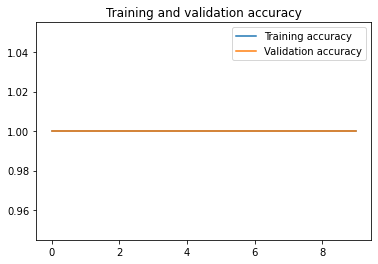

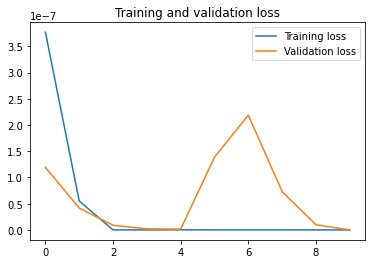

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Remove overfitting by adding dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

In [ ]:
batch_size = 64
epochs = 10
num_classes = 2

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=2,
                             validation_data=(X_val, y_val))

In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Prediction from Test set

In [ ]:
predicted_classes = model.predict(X_test)
predicted_classes.shape, y_test.shape

In [ ]:
print(predicted_classes[0])
print(np.argmax(np.round(predicted_classes[0])))

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape

In [ ]:
# correct = np.where(predicted_classes==X_test)[0]
# print(f'correct labels - {len(correct)}')
# for i, correct in enumerate(correct[:9]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(X_test[correct].reshape(10,10), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format(predicted_classes[correct],X_test[correct]))
#     plt.tight_layout()